In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [3]:
df1 = pd.read_excel('sn_compliance_control.xlsx')

In [4]:
df1.sample(5)

,Number,Name,Profile,Owner,Policy Statement,State,Status,Exempt,Weighting,Active,...,Key control,Owning group,Profile type,Profile type.1,Source,Tags,Type,Updated,Updated by,Updates
865,CTRL0020294,Establish and maintain electronic storage medi...,Brother,Amos Linnan,Establish and maintain electronic storage medi...,Monitor,Compliant,False,10,True,...,False,NaN,NaN,NaN,"3c81b176cb300200829cf865734c9c96,",NaN,Establish/Maintain Documentation,2017-02-28 11:41:36,admin,0
1206,CTRL0020635,Protect remote access accounts with encryption.,SAP America,Amos Linnan,Protect remote access accounts with encryption.,Monitor,Compliant,False,10,True,...,False,NaN,NaN,NaN,"3c81b176cb300200829cf865734c9c96,",NaN,Configuration,2017-02-28 11:48:40,admin,0
125,CTRL0010126,Update associated documentation after the syst...,IT Services,Fred Luddy,Update associated documentation after the syst...,Monitor,Compliant,False,10,True,...,False,NaN,NaN,NaN,"7d61f176cb300200829cf865734c9ce8,",NaN,Establish/Maintain Documentation,2017-02-28 12:15:47,admin,6
739,CTRL0020168,Establish and maintain a record classification...,Lucasarts Entertainment,Amos Linnan,Establish and maintain a record classification...,Monitor,Compliant,False,10,True,...,False,NaN,NaN,NaN,"3c81b176cb300200829cf865734c9c96,",NaN,Establish/Maintain Documentation,2017-02-28 11:41:35,admin,0
70,CTRL0010071,Manage change requests.,This Service-now instance,System Administrator,Manage change requests.,Monitor,Non Compliant,False,10,True,...,False,NaN,NaN,NaN,"7d61f176cb300200829cf865734c9ce8,",NaN,Business Processes,2017-02-28 12:15:51,admin,7


In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
pd.set_option('display.max_colwidth', -1)

df= df1[['Classification','Description']]
df.head()

,Classification,Description
0,Preventive,Establish and maintain identification mechanism termination procedures.
1,Detective,Review facility access lists.
2,Preventive,"Manage access to loading docks, unloading docks, and mail rooms."
3,Preventive,Establish and maintain a visitor access permissions policy.
4,Preventive,"Use locks with electronic authentication systems or cipher locks, as necessary."


In [7]:
df.sample(5)

,Classification,Description
1384,Preventive,Control remote access through a network access control.
1438,Preventive,Control remote access through a network access control.
265,Preventive,Establish and maintain a change control program.
1181,Preventive,Disallow remote users from copying files to remote devices.
1247,Preventive,Control remote access through a network access control.


In [8]:
# renaming the cols
df.rename(columns={'Classification':'target','Description':'text'},inplace=True)
df.sample(5)

,target,text
239,Preventive,NaN
58,Preventive,Manage change requests.
1200,Preventive,Protect remote access accounts with encryption.
1369,Preventive,Protect remote access accounts with encryption.
772,Preventive,Establish and maintain electronic storage media management procedures.


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,1,Establish and maintain identification mechanism termination procedures.
1,0,Review facility access lists.
2,1,"Manage access to loading docks, unloading docks, and mail rooms."
3,1,Establish and maintain a visitor access permissions policy.
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary."


In [12]:
df.dropna(subset=['text'],axis=0,inplace=True)

In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.shape

(1489, 2)

In [15]:
# check for duplicate values
df.duplicated().sum()

1435

In [16]:
# remove duplicates
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(54, 2)

## 2.EDA

In [19]:
df.head()

,target,text
0,1,Establish and maintain identification mechanism termination procedures.
1,0,Review facility access lists.
2,1,"Manage access to loading docks, unloading docks, and mail rooms."
3,1,Establish and maintain a visitor access permissions policy.
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary."


In [20]:
df['target'].value_counts()

1    45
0    9 
Name: target, dtype: int64

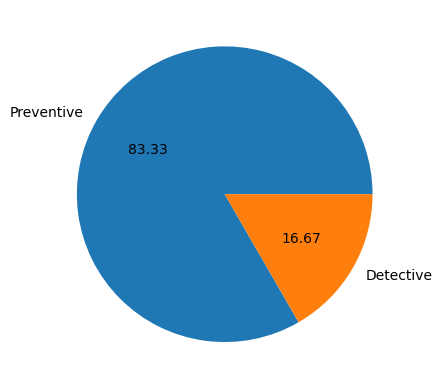

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Preventive','Detective'],autopct="%0.2f")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhuvaneshwar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,1,Establish and maintain identification mechanism termination procedures.,71
1,0,Review facility access lists.,29
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64
3,1,Establish and maintain a visitor access permissions policy.,59
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79


In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,1,Establish and maintain identification mechanism termination procedures.,71,8
1,0,Review facility access lists.,29,5
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13
3,1,Establish and maintain a visitor access permissions policy.,59,9
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,Establish and maintain identification mechanism termination procedures.,71,8,1
1,0,Review facility access lists.,29,5,1
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13,1
3,1,Establish and maintain a visitor access permissions policy.,59,9,1
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,54.000000,54.000000,54.0
mean,68.296296,10.296296,1.0
std,29.775024,4.302828,0.0
min,15.000000,3.000000,1.0
25%,50.250000,8.000000,1.0
50%,63.000000,9.000000,1.0
75%,77.750000,12.000000,1.0
max,176.000000,28.000000,1.0


In [33]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9.000000,9.000000,9.0
mean,62.444444,9.333333,1.0
std,24.197681,2.872281,0.0
min,29.000000,5.000000,1.0
25%,51.000000,8.000000,1.0
50%,55.000000,9.000000,1.0
75%,71.000000,10.000000,1.0
max,114.000000,15.000000,1.0


In [34]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,45.000000,45.000000,45.0
mean,69.466667,10.488889,1.0
std,30.871140,4.535828,0.0
min,15.000000,3.000000,1.0
25%,50.000000,8.000000,1.0
50%,63.000000,10.000000,1.0
75%,79.000000,12.000000,1.0
max,176.000000,28.000000,1.0


In [35]:
import seaborn as sns

<AxesSubplot:xlabel='num_words', ylabel='Count'>

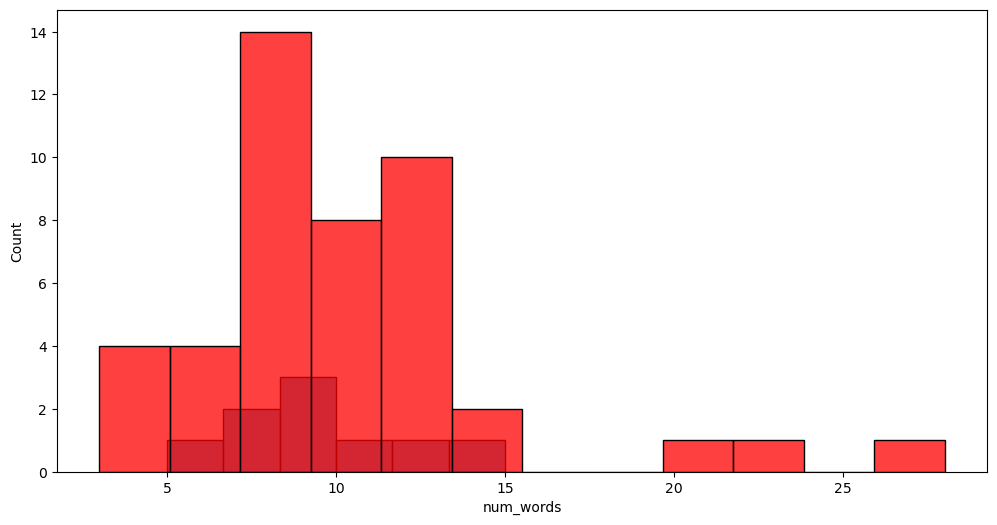

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

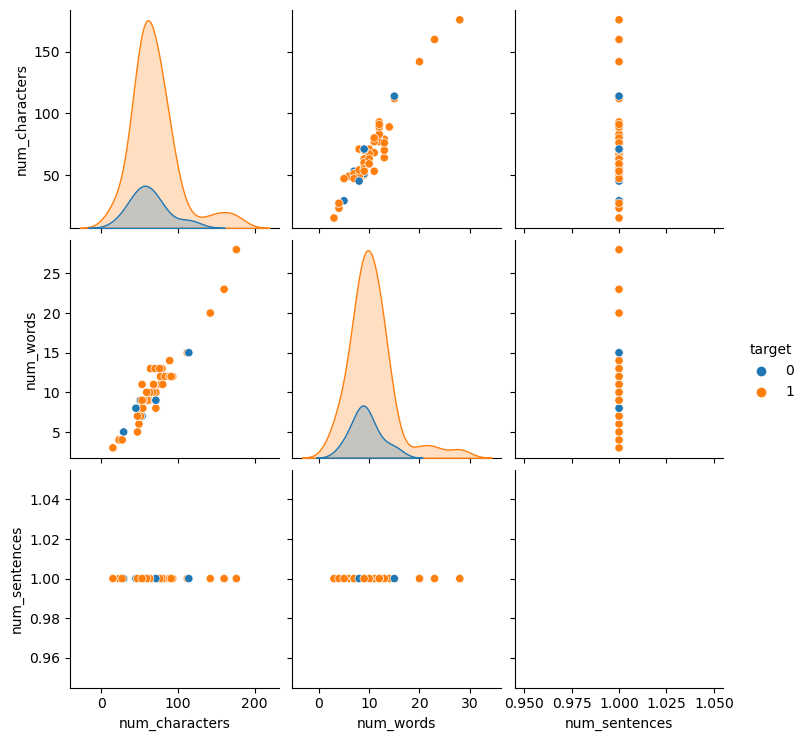

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

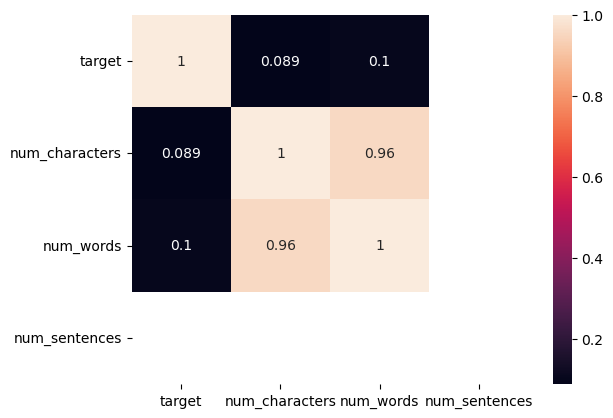

In [38]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [39]:
nltk.download("stopwords")
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhuvaneshwar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
df['text'][10]

'Authorize visitors before granting entry to physical areas containing restricted data or restricted information.'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Establish and maintain identification mechanism termination procedures.,71,8,1,establish maintain identif mechan termin procedur
1,0,Review facility access lists.,29,5,1,review facil access list
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13,1,manag access load dock unload dock mail room
3,1,Establish and maintain a visitor access permissions policy.,59,9,1,establish maintain visitor access permiss polici
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13,1,use lock electron authent system cipher lock necessari


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

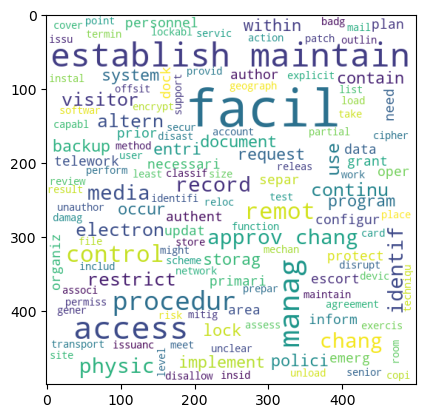

In [46]:
prevent_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(prevent_wc)
plt.show()

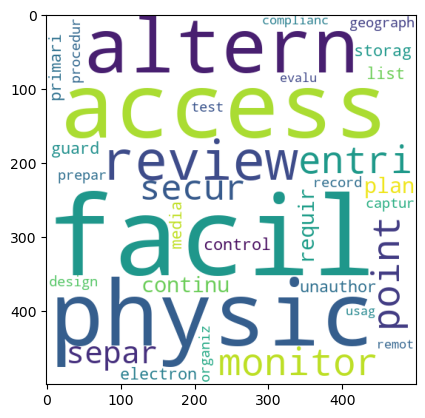

In [47]:
detect_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(detect_wc)
plt.show()

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Establish and maintain identification mechanism termination procedures.,71,8,1,establish maintain identif mechan termin procedur
1,0,Review facility access lists.,29,5,1,review facil access list
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13,1,manag access load dock unload dock mail room
3,1,Establish and maintain a visitor access permissions policy.,59,9,1,establish maintain visitor access permiss polici
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13,1,use lock electron authent system cipher lock necessari


In [50]:
Prevent_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        Prevent_corpus.append(word)
        

In [51]:
len(Prevent_corpus)

306

In [55]:
detect_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        detect_corpus.append(word)

In [57]:
len(detect_corpus)

55

In [58]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Establish and maintain identification mechanism termination procedures.,71,8,1,establish maintain identif mechan termin procedur
1,0,Review facility access lists.,29,5,1,review facil access list
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13,1,manag access load dock unload dock mail room
3,1,Establish and maintain a visitor access permissions policy.,59,9,1,establish maintain visitor access permiss polici
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13,1,use lock electron authent system cipher lock necessari


## 4. Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [62]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [63]:
X.shape

(54, 140)

In [64]:
y = df['target'].values

In [65]:
from imblearn.over_sampling import SMOTE
import collections
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({1: 45, 0: 9})
Resample dataset shape Counter({1: 45, 0: 45})


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7777777777777778
[[8 0]
 [4 6]]
1.0


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.6666666666666666
[[8 0]
 [6 4]]
1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8333333333333334
[[8 0]
 [3 7]]
1.0


In [73]:
# tfidf --> MNB

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [78]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8333333333333334, 1.0)

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8333333333333334
Precision -  1.0
For  KN
Accuracy -  0.5555555555555556
Precision -  1.0
For  NB
Accuracy -  0.6666666666666666
Precision -  1.0
For  DT
Accuracy -  0.7222222222222222
Precision -  1.0
For  LR
Accuracy -  0.7222222222222222
Precision -  1.0
For  RF
Accuracy -  0.8333333333333334
Precision -  1.0
For  AdaBoost
Accuracy -  0.9444444444444444
Precision -  1.0
For  BgC
Accuracy -  0.6666666666666666
Precision -  1.0
For  ETC
Accuracy -  0.8333333333333334
Precision -  1.0
For  GBDT
Accuracy -  0.7222222222222222
Precision -  1.0
For  xgb
Accuracy -  0.8333333333333334
Precision -  0.8888888888888888


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.833333,1.000000
1,KN,0.555556,1.000000
2,NB,0.666667,1.000000
3,DT,0.722222,1.000000
4,LR,0.722222,1.000000
5,RF,0.833333,1.000000
6,AdaBoost,0.944444,1.000000
7,BgC,0.666667,1.000000
8,ETC,0.833333,1.000000
9,GBDT,0.722222,1.000000


In [82]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [83]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.833333
1,KN,Accuracy,0.555556
2,NB,Accuracy,0.666667
3,DT,Accuracy,0.722222
4,LR,Accuracy,0.722222
5,RF,Accuracy,0.833333
6,AdaBoost,Accuracy,0.944444
7,BgC,Accuracy,0.666667
8,ETC,Accuracy,0.833333
9,GBDT,Accuracy,0.722222


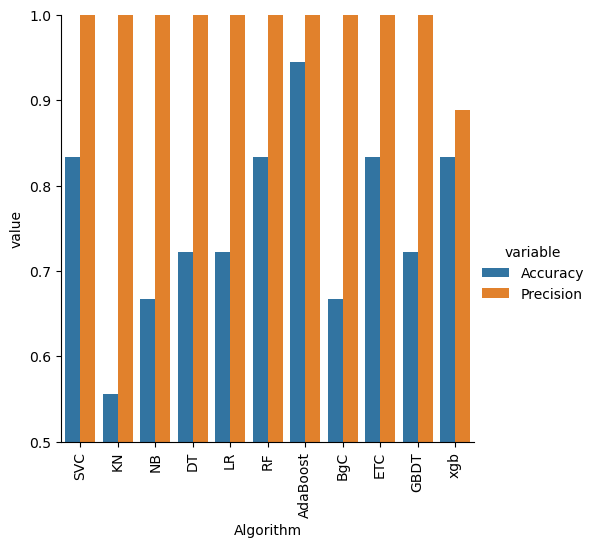

In [84]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [88]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [89]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [91]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000
1,KN,0.555556,1.000000,0.555556,1.000000,0.555556,1.000000,0.555556,1.000000
2,NB,0.666667,1.000000,0.666667,1.000000,0.666667,1.000000,0.666667,1.000000
3,DT,0.722222,1.000000,0.722222,1.000000,0.722222,1.000000,0.722222,1.000000
4,LR,0.722222,1.000000,0.722222,1.000000,0.722222,1.000000,0.722222,1.000000
5,RF,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000
6,AdaBoost,0.944444,1.000000,0.944444,1.000000,0.944444,1.000000,0.944444,1.000000
7,BgC,0.666667,1.000000,0.666667,1.000000,0.666667,1.000000,0.666667,1.000000
8,ETC,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000
9,GBDT,0.722222,1.000000,0.722222,1.000000,0.722222,1.000000,0.722222,1.000000


In [92]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [94]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8333333333333334
Precision 1.0


In [96]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier

In [98]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [99]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 1.0
Precision 1.0


In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))